In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_curve,roc_auc_score

In [2]:
df=pd.read_csv('titanic-passengers.csv',delimiter=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


# <u>1. Data preparation</u>

In [3]:
# Show null values rate for each feature

df.isnull().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [4]:
# Drop the feature 'Cabin' which has more than half of missing values

df.drop(columns='Cabin',inplace=True)

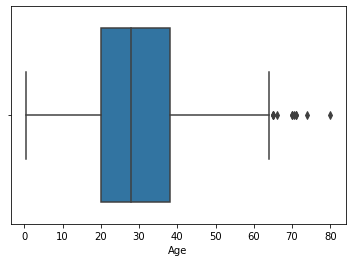

In [5]:
# Visualize the distribution of the feature 'Age'

sns.boxplot(x='Age',data=df);

<b>The feature 'Age' shows that there are some outliers values</b>

In [6]:
# Remove outliers values for the feature 'Age' and subset the data between 10% and 90% of the distribution

low,high = df['Age'].quantile([0.1,0.9])
mask_age = df['Age'].between(low,high)
df=df[mask_age]

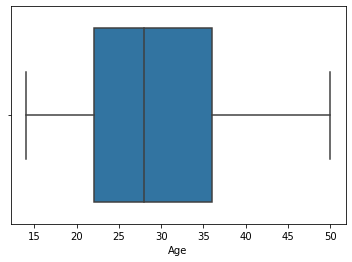

In [7]:
sns.boxplot(x='Age',data=df);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  579 non-null    int64  
 1   Survived     579 non-null    object 
 2   Pclass       579 non-null    int64  
 3   Name         579 non-null    object 
 4   Sex          579 non-null    object 
 5   Age          579 non-null    float64
 6   SibSp        579 non-null    int64  
 7   Parch        579 non-null    int64  
 8   Ticket       579 non-null    object 
 9   Fare         579 non-null    float64
 10  Embarked     578 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 54.3+ KB


In [9]:
# From the previous study, the feature 'Embarked' is meaningful to predict the number of survivors. Let's fill the null value to the most representative

df['Embarked'].value_counts()

S    454
C    103
Q     21
Name: Embarked, dtype: int64

In [10]:
# Fill null value to the most representative value 'S'

df['Embarked'].fillna('S',inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
# Change categorical data to numerical for feature 'Survived'

df['Survived']=df['Survived'].map({'No':0,'Yes':1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [13]:
# Change categorical data to numerical for feature 'Sex'

df['Sex']=df['Sex'].map({'female':0,'male':1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,S


In [14]:
# Change categorical data to numerical for feature 'Embarked'

df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})


In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,0
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,0


In [16]:
# Show the correlation between 'Survived' and other features

df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.003079,-0.029575,0.044511,0.060147,-0.082583,-0.005793,0.012163,-0.012789
Survived,-0.003079,1.000000,-0.416994,-0.574621,0.039389,0.044592,0.075266,0.300604,0.141593
Pclass,-0.029575,-0.416994,1.000000,0.214290,-0.281264,-0.091218,-0.018951,-0.563732,-0.140025
Sex,0.044511,-0.574621,0.214290,1.000000,0.020435,-0.139010,-0.270179,-0.203876,-0.129633
Age,0.060147,0.039389,-0.281264,0.020435,1.000000,-0.052941,0.054481,0.100645,-0.025368
SibSp,-0.082583,0.044592,-0.091218,-0.139010,-0.052941,1.000000,0.288477,0.198162,-0.021206
Parch,-0.005793,0.075266,-0.018951,-0.270179,0.054481,0.288477,1.000000,0.192545,0.008941
Fare,0.012163,0.300604,-0.563732,-0.203876,0.100645,0.198162,0.192545,1.000000,0.206197
Embarked,-0.012789,0.141593,-0.140025,-0.129633,-0.025368,-0.021206,0.008941,0.206197,1.000000


# <u>2. Build model</u>

In [17]:
# Split data, training data=80%, testing data=20%

x=df[['Sex','Pclass','Embarked']]
y=df['Survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [18]:
# Build the logistic regression model

model=LogisticRegression()

In [19]:
# Fit x_train, y_train

model.fit(x_train,y_train)

LogisticRegression()

In [20]:
# Predict x_test

y_pred=model.predict(x_test)

In [21]:
# Check and show the accuracy of the model

print('Accuracy={:.2f}'.format(model.score(x_test,y_test)))

Accuracy=0.74


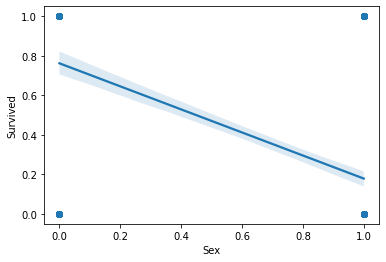

In [22]:
# Visualize the logistic regression of 'Survived' based on 'Sex'

sns.regplot(x='Sex',y='Survived',data=df);

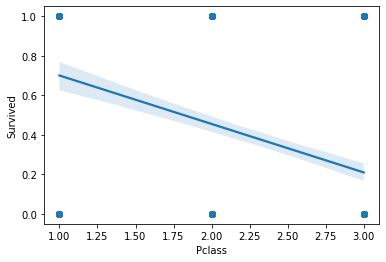

In [23]:
# Visualize the logistic regression of 'Survived' based on 'PClass'

sns.regplot(x='Pclass',y='Survived',data=df);

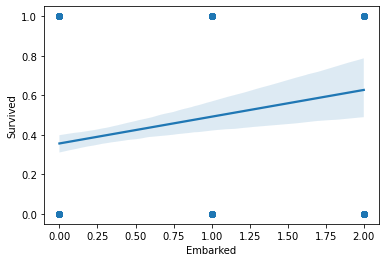

In [24]:
# Visualize the logistic regression of 'Survived' based on 'Embarked'

sns.regplot(x='Embarked',y='Survived',data=df);

<b><u>CONCLUSION</u>: from these outputs, a female travelling on first class and embarking in Queenstown has the highest chance to survive</b>

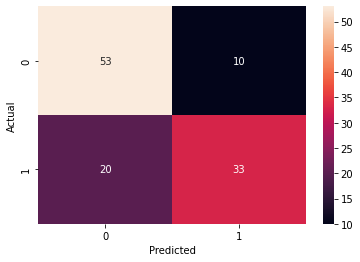

In [25]:
# Compute the coonfusion matrix

confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True);

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        63
           1       0.77      0.62      0.69        53

    accuracy                           0.74       116
   macro avg       0.75      0.73      0.73       116
weighted avg       0.74      0.74      0.74       116



<b>ROC stands for Receiver Operator Characteristic (ROC)/ Area Under the Curve (AUC). It is an evaluation metric used to determine the performance of a logistic regression model at distinguishing between the positive and negative classes. ROC curve is used to plot the True Positive Rate (or Sensitivity) against the False Positive Rate (or Specificity) at various threshold values.</b>

In [27]:
# Predict probability

pred_prob=model.predict_proba(x_test)


In [28]:
# roc curve for model

fpr,tpr,threshold = roc_curve(y_test,pred_prob[:,1],pos_label=1);
threshold

array([1.92792176, 0.92792176, 0.92588132, 0.92378787, 0.79720952,
       0.79229706, 0.56043474, 0.5455467 , 0.44347158, 0.43605184,
       0.20049255, 0.1957085 , 0.07314502, 0.07112933])

In [29]:
# roc curve for the case where True Positive is equal to False Positive

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [30]:
# Determine auc score

auc_score = roc_auc_score(y_test, pred_prob[:,1])
print('AUC score for the model is: ',round(auc_score,2))

AUC score for the model is:  0.82


<b>With this AUC score of 0.82 (0.5<AUC<1), there is a high chance that the model will be able to distinguish the positive class values from the negative class values. So, the model is able to do a pretty good job of classifying our data.</b>

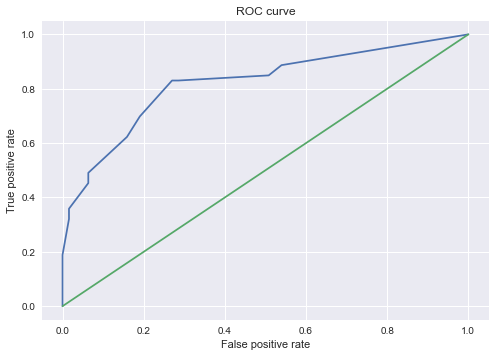

In [31]:
# Plot ROC curves

plt.style.use('seaborn')

plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.plot(p_fpr,p_tpr)
plt.show();